In [74]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import shapefile
from pylab import mpl
from sklearn.metrics import accuracy_score

sfArea = shapefile.Reader('范围.shp')
sfPoint = shapefile.Reader('场地类别.shp')

In [75]:
#read index of points
features = sfPoint.shapeRecords()[:]
index = []
for feature in features:
    tmp = feature.shape.__geo_interface__['coordinates']
    index.append(tmp)
index = np.array(index)

#read the labels and change to float
recds = sfPoint.records()
dic, count = {}, 0
for i in recds:
    if i[3] not in dic.values():
        dic[count] = i[3]
        count += 1
labels = np.array(recds[:], dtype=np.string_)[:, 3]
for i in range(count):
    labels[labels == dic[i]] = i
labels = labels.astype(np.float)

In [76]:
#create test data
shape_rec = sfArea.shapeRecords()[-1]
pts = np.array(shape_rec.shape.points)
x_min, x_max = pts[:, 0].min() - 0.03, index[:, 0].max() + 0.05
y_min, y_max = pts[:, 1].min() - 0.03, index[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.003),np.arange(y_min, y_max, 0.003))

#train model and predict
clf = SVC(C=20, gamma=8000)
clf.fit(index,labels)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


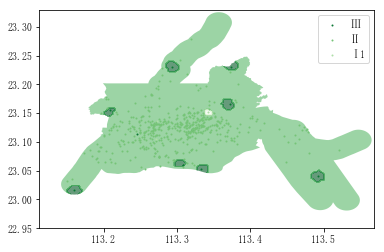

In [77]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
cont = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens_r, alpha=0.6)

# Plot also the training points
# get colors as contourf
levels = np.arange(count)
cnorm = plt.Normalize(vmin=0, vmax=count)
clevels = [levels[0]] + list(0.5*(levels[1:]+levels[:-1])) + [levels[-1]]
colors = plt.cm.Greens_r(cnorm(clevels))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')
# scatter
labels = np.array(labels)
for i in range(count):
    l = plt.scatter(index[labels == i, 0], index[labels == i, 1], s=1,c=cmap(i), label = dic[i].decode('gbk'))

#translate the area to a path and clip
shape_rec = sfArea.shapeRecords()[-1]
vertices = []
codes = []
pts = shape_rec.shape.points
prt = list(shape_rec.shape.parts) + [len(pts)]
for i in range(len(prt) - 1):
    for j in range(prt[i], prt[i+1]):
        vertices.append((pts[j][0], pts[j][1]))
    codes += [Path.MOVETO]
    codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
    codes += [Path.CLOSEPOLY]
clip = Path(vertices, codes)
clip = PathPatch(clip, transform=ax.transData, edgecolor='k')
for col in cont.collections:
    col.set_clip_path(clip)

#set the limit of x y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#set labels
mpl.rcParams['font.sans-serif'] = ['FangSong']
plt.legend()

#save result and show figure
figure_fig = plt.gcf()  # 'get current figure'
# figure_fig.savefig('./result/result.eps', format='eps', dpi=1000)
figure_fig.savefig('result.jpg', format='jpg', dpi=1000)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


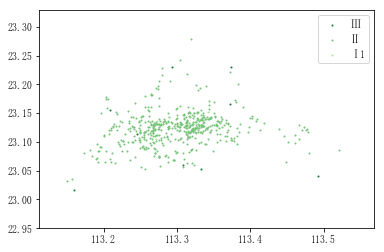

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

# get colors as contourf
levels = np.arange(count)
cnorm = plt.Normalize(vmin=0, vmax=count)
clevels = [levels[0]] + list(0.5*(levels[1:]+levels[:-1])) + [levels[-1]]
colors = plt.cm.Greens_r(cnorm(clevels))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='both')
# scatter
labels = np.array(labels)
for i in range(count):
    l = plt.scatter(index[labels == i, 0], index[labels == i, 1], s=1,c=cmap(i), label = dic[i].decode('gbk'))
    
#set the limit of x y
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#set labels
mpl.rcParams['font.sans-serif'] = ['FangSong']
plt.legend()

#save result and show figure
figure_fig = plt.gcf()  # 'get current figure'
# figure_fig.savefig('data.eps', format='eps', dpi=1000)
figure_fig.savefig('data.jpg', format='jpg', dpi=1000)
plt.show()